In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
from IPython.lib.display import Audio
from scipy.fftpack import fft, ifft
from scipy.io import loadmat
import scipy.signal as sgnl
import scipy.io.wavfile as wav
import pyaudio
import sys
import wave
import operator
import scipy
from python_speech_features import mfcc

In [8]:
#reading audio files in database
Fs, a1 = wav.read("database_a18_baki_a.wav")
Fs, b1 = wav.read("database_a18_baki_b.wav")
Fs, c1 = wav.read("database_a18_baki_c.wav")
#first's are done
Fs, a2 = wav.read("database_a18_ebru_a.wav")
Fs, b2 = wav.read("database_a18_ebru_b.wav")
Fs, c2 = wav.read("database_a18_ebru_c.wav")
#second's are done
Fs, a3 = wav.read("database_a18_safak_a.wav")
Fs, b3 = wav.read("database_a18_safak_b.wav")
Fs, c3 = wav.read("database_a18_safak_c.wav")
#all done


#########
#recording part
CHUNK = 16000
FORMAT = pyaudio.paInt32
CHANNELS = 1 #1 channel for audio
RATE = 16000 #sampling
RECORD_SECONDS = 3 #record time

for clock in range(0,1):

    WAVE_OUTPUT_FILENAME = "C:/Users/safak/OneDrive/Masaüstü/Dsp_Proje/output"+str(clock)+".wav"
    #creating .wav file with name

    #recording parameteres
    p = pyaudio.PyAudio()

    stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

    print("* recording")
    
    frames = []
    #RATE/CHUNK is also 1.
    for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
        data = stream.read(CHUNK)
        frames.append(data)
    print("* done recording")
    #stop streaming
    stream.stop_stream()
    stream.close()
    p.terminate()
    #formatting file as want
    wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
    wf.setnchannels(CHANNELS)
    wf.setsampwidth(p.get_sample_size(FORMAT))
    wf.setframerate(RATE)
    wf.writeframes(b''.join(frames))
    wf.close()
    print("Your voice has recorded succesfully.")
    
    result = []#for print

* recording
* done recording
Your voice has recorded succesfully.


Pure audio input :


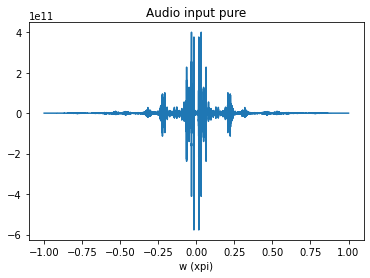

Filtered audio input :


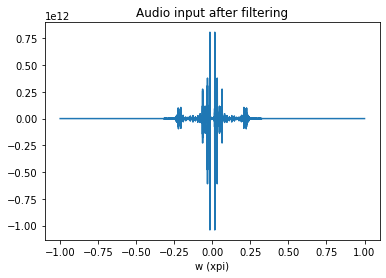

In [9]:
Fs, input_audio_Pure = wav.read("C:/Users/safak/OneDrive/Masaüstü/Dsp_Proje/output0.wav")
#read to created file as input
#handling input_audio
print('Pure audio input :')
display(Audio(input_audio_Pure, rate=Fs))#pure audio file

#fourier transform of not-filtered input audio
N = 48000
w = np.linspace(-np.pi,np.pi,N)
input_fourier_noisy = np.fft.fftshift(fft(input_audio_Pure,N))
plt.plot(w/np.pi,np.real(input_fourier_noisy))

plt.title("Audio input pure")
plt.xlabel("w (xpi)")
plt.show()

#this is our lowpass, equiripple, 0.2pi cutoff frequency  filter, 
#designed for the denoising audio, designed on pyfda
filter_data = loadmat('a18_filtre.mat') # load the filter obtained from␣
Coeffs = filter_data['ba'].astype(np.float64) # getting filter coefficients
b = Coeffs[0,:] # first column is b
a = 1 # fir filter..

w, Hw = sgnl.freqz(b,a)

input_audio = sgnl.lfilter(b, a, input_audio_Pure) #filtering via convolution

print("Filtered audio input :")
display(Audio(input_audio, rate=Fs))

#fourier transform of filtered input audio
w = np.linspace(-np.pi, np.pi, N)
input_fourier=np.fft.fftshift(fft(input_audio,N))

plt.plot(w/np.pi,np.real(input_fourier))
plt.title("Audio input after filtering")
plt.xlabel("w (xpi)")
plt.show()

mfcc_input = mfcc(input_audio,Fs)

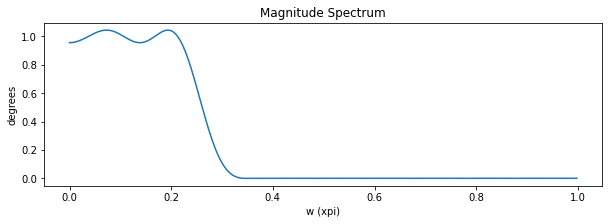

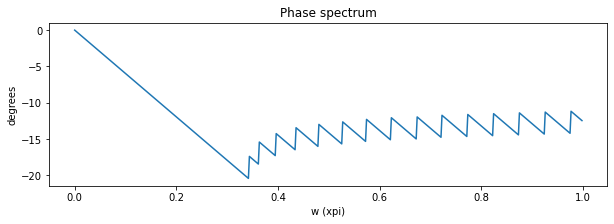

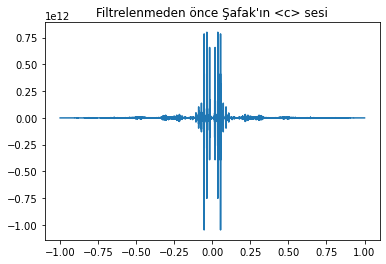

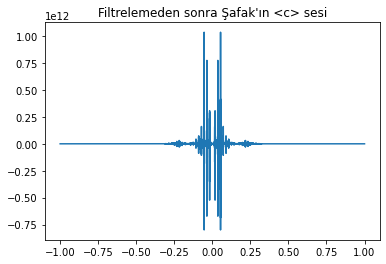

In [10]:
#here is the low pass filter
w, Hw = sgnl.freqz(b,a)

Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))

plt.figure(figsize=[10,3])
plt.plot(w/np.pi, Hw_mag)
plt.title("Magnitude Spectrum")
plt.ylabel('degrees')
plt.xlabel("w (xpi)")
plt.show()

plt.figure(figsize=[10,3])
plt.plot(w/np.pi, Hw_phs), 
plt.ylabel('degrees')
plt.title("Phase spectrum")
plt.xlabel("w (xpi)")
plt.show()

#filtering audio data in the database
a1_ = sgnl.lfilter(b, a, a1)
a2_ = sgnl.lfilter(b, a, a2)
a3_ = sgnl.lfilter(b, a, a3)

b1_ = sgnl.lfilter(b, a, b1)
b2_ = sgnl.lfilter(b, a, b2)
b3_ = sgnl.lfilter(b, a, b3)

c1_ = sgnl.lfilter(b, a, c1)
c2_ = sgnl.lfilter(b, a, c2)
c3_ = sgnl.lfilter(b, a, c3)


#mel ceptruming
mfcc_a1 =  mfcc(a1_, Fs)
mfcc_a2 =  mfcc(a2_, Fs)
mfcc_a3 =  mfcc(a3_, Fs)
mfcc_b1 =  mfcc(b1_, Fs)
mfcc_b2 =  mfcc(b2_, Fs)
mfcc_b3 =  mfcc(b3_, Fs)
mfcc_c1 =  mfcc(c1_, Fs)
mfcc_c2 =  mfcc(c2_, Fs)
mfcc_c3 =  mfcc(c3_, Fs)

mfcc_list=[[mfcc_a1,mfcc_b1,mfcc_c1],[mfcc_a2,mfcc_b2,mfcc_c2],[mfcc_a3,mfcc_b3,mfcc_c3]]

##fourier
N = 48000
#fourier of 'a' audios
a1_fft=np.fft.fftshift(fft(a1_,N))
a2_fft=np.fft.fftshift(fft(a2_,N))
a3_fft=np.fft.fftshift(fft(a3_,N))

#fourier of 'b' audios
b1_fft=np.fft.fftshift(fft(b1_,N))
b2_fft=np.fft.fftshift(fft(b2_,N))
b3_fft=np.fft.fftshift(fft(b3_,N))

#fourier of 'c' audios
c1_fft=np.fft.fftshift(fft(c1_,N))
c2_fft=np.fft.fftshift(fft(c2_,N))
c3_fft=np.fft.fftshift(fft(c3_,N))

fourier_list=[[a1_fft,b1_fft,c1_fft],[a2_fft,b2_fft,c2_fft],[a3_fft,b3_fft,c3_fft]]
key_Dictionary = {
    "Baki" : 0,
    "Ebru" : 1,
    "Safak" : 2
}


###example about database audio's filtering#####
w = np.linspace(-np.pi, np.pi, N)

c3_fft_noisy=np.fft.fftshift(fft(c3,N))
plt.title("Filtrelenmeden önce Şafak'ın <c> sesi")
plt.plot(w/np.pi,np.real(c3_fft_noisy))
plt.show()

plt.title("Filtrelemeden sonra Şafak'ın <c> sesi")
plt.plot(w/np.pi,np.real(c3_fft))
plt.show()
###example about database audio's filtering#####


### Desicion Part

In [11]:
#input and Baki's database's similarities
#input and Baki's a similarity
similary_Baki_1= scipy.stats.kendalltau(mfcc_input,mfcc_a1)
#input and Baki's b similarity
similary_Baki_2= scipy.stats.kendalltau(mfcc_input,mfcc_b1)
#input and Baki's c similarity
similary_Baki_3= scipy.stats.kendalltau(mfcc_input,mfcc_c1)

#input and Ebru's database's similarities
#input and Ebru's a similarity
similary_Ebru_1= scipy.stats.kendalltau(mfcc_input,mfcc_a2)
#input and Ebru's b similarity
similary_Ebru_2= scipy.stats.kendalltau(mfcc_input,mfcc_b2)
#input and Ebru's c similarity
similary_Ebru_3= scipy.stats.kendalltau(mfcc_input,mfcc_c2)

#input and Şafak's database's similarities
#input and Safak's a similarity
similary_Safak_1= scipy.stats.kendalltau(mfcc_input,mfcc_a3)
#input and Safak's b similarity
similary_Safak_2= scipy.stats.kendalltau(mfcc_input,mfcc_b3)
#input and Safak's c similarity
similary_Safak_3= scipy.stats.kendalltau(mfcc_input,mfcc_c3)

##similarty arrays
similarty_to_Baki=[(similary_Baki_1.correlation),(similary_Baki_2.correlation),(similary_Baki_3.correlation)]
similarty_to_Ebru=[(similary_Ebru_1.correlation),(similary_Ebru_2.correlation),(similary_Ebru_3.correlation)]
similarty_to_Safak=[(similary_Safak_1.correlation),(similary_Safak_2.correlation),(similary_Safak_3.correlation)]

sum_Baki=0
sum_Ebru=0
sum_Safak=0

#sum of similaritys (correlation values)
for i in range(0,len(similarty_to_Baki)):
    sum_Baki = sum_Baki + (similarty_to_Baki[i])
    sum_Ebru = sum_Ebru + (similarty_to_Ebru[i])
    sum_Safak = sum_Safak + (similarty_to_Safak[i])

#hashmap
sum_dictionary={
    "Baki" : (sum_Baki),
    "Ebru" : (sum_Ebru),
    "Safak": (sum_Safak)
}
#printing similarity total values
#finding max of the dictionary, and assign it to the owner_of_audio variable
owner_of_audio = max(sum_dictionary, key=sum_dictionary.get)#this is the get max from dictionary

#--
##this is not necessary (key recognizing), but easy to implement
#letter's and input's power correlation for listing 
letter_a = similarty_to_Baki[0] + similarty_to_Ebru[0] + similarty_to_Safak[0]
letter_b = similarty_to_Baki[1] + similarty_to_Ebru[1] + similarty_to_Safak[1]
letter_c = similarty_to_Baki[2] + similarty_to_Ebru[2] + similarty_to_Safak[2]
letter_list = [letter_a,letter_b,letter_c]

max_value = max(letter_list)
index = letter_list.index(max_value)
letter = ["A","B","C"]
#--
print("Cumulative Correlations")
print(sum_dictionary)

print("\nOwner of the audio",owner_of_audio)#,"and said :",letter[index])

Cumulative Correlations
{'Baki': 1.105032267051143, 'Ebru': 1.3354618725257172, 'Safak': 1.410829823099578}

Owner of the audio Safak


# Analysis,
### Input and letter's similarty

In [6]:
print("\t\t\t     A \t\t\tB    \t\t  C")
print("Baki :\t\t",similarty_to_Baki)
print("Ebru :\t\t",similarty_to_Ebru)
print("Safak :\t\t",similarty_to_Safak)
print(letter[index])

			     A 			B    		  C
Baki :		 [0.35008429724906165, 0.14510897867325281, 0.17234573563699473]
Ebru :		 [0.35623038961840287, 0.1925349698196914, 0.17716987130386058]
Safak :		 [0.5333024117632962, 0.21974551009402127, 0.18562912308748922]
A


### Input and most similar letter's frequency spectrum's

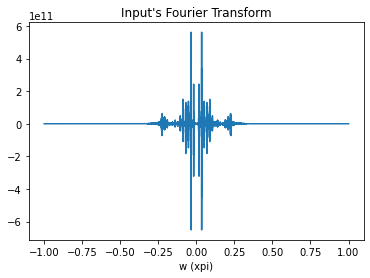

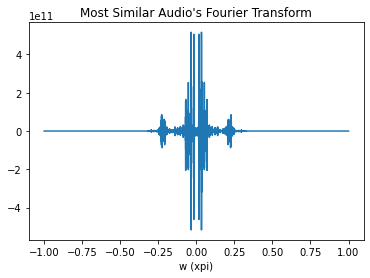

In [200]:
w = np.linspace(-np.pi, np.pi, N)

plt.plot(w/np.pi,np.real(input_fourier))
plt.xlabel("w (xpi)")
plt.title("Input's Fourier Transform"),plt.show()

plt.plot(w/np.pi,np.real(fourier_list[key_Dictionary[owner_of_audio]][index]))
plt.xlabel("w (xpi)")
plt.title("Most Similar Audio's Fourier Transform")
plt.show()

### Input and most similar letter's mel frequency ceptrum coefficient

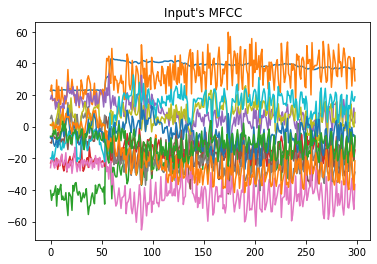

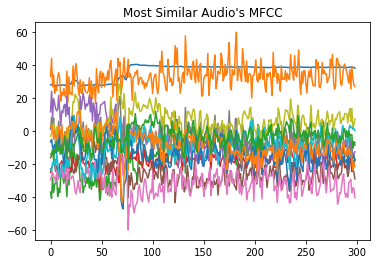

In [39]:
plt.plot(mfcc_input)
plt.title("Input's MFCC")
plt.show()

plt.plot((mfcc_list[key_Dictionary[owner_of_audio]][index]))
plt.title("Most Similar Audio's MFCC")
plt.show()

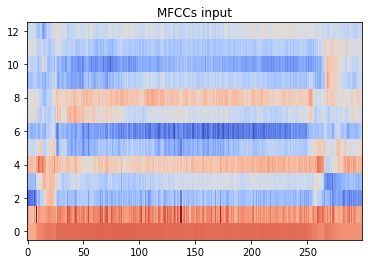

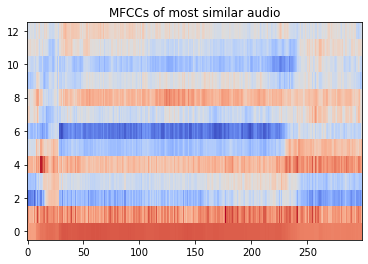

In [202]:
ig, ax = plt.subplots()
mfcc_data= np.swapaxes(mfcc_input, 0 ,1)
cax = ax.imshow(mfcc_data, interpolation='nearest', cmap=cm.coolwarm, origin='lower', aspect='auto')
ax.set_title('MFCCs input')
#Showing mfcc_data
plt.show()
ig, ax = plt.subplots()
mfcc_data= np.swapaxes(mfcc_list[key_Dictionary[owner_of_audio]][index], 0 ,1)
cax = ax.imshow(mfcc_data, interpolation='nearest', cmap=cm.coolwarm, origin='lower', aspect='auto')
ax.set_title('MFCCs of most similar audio')
#Showing mfcc_data
plt.show()
